# DSC630 Term Project 3 - Heart Disease Prediction
Created by: David Hatchet
Created on: 2026-02-28

This project creates three binary classification models to predict heart disease. The primary purpose is to compare the preformance of each model.
The three models are:
    - Logistic Regression
    - Gradient Boosting
    - Multi-Layer Perceptron

Tap complete from cursor was used to generate some of the code below, however most of it was edited after the fact to improve the code and insure it worked.

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torchmetrics
import torch

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc


## Load and Review Data

In [238]:
df = pd.read_csv('data/heart.csv')
df.columns=(df.columns.str.strip().str.lower().str.replace(" ","_"))
df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [239]:
df.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [240]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    str    
 2   chestpaintype   918 non-null    str    
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    str    
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    str    
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    str    
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), str(5)
memory usage: 86.2 KB


In [241]:
print(  df['sex'].value_counts())
print(df['chestpaintype'].value_counts())
print(df['restingecg'].value_counts())
print(df['exerciseangina'].value_counts())
print(df['st_slope'].value_counts())

sex
M    725
F    193
Name: count, dtype: int64
chestpaintype
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
restingecg
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
exerciseangina
N    547
Y    371
Name: count, dtype: int64
st_slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [242]:
df.isnull().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

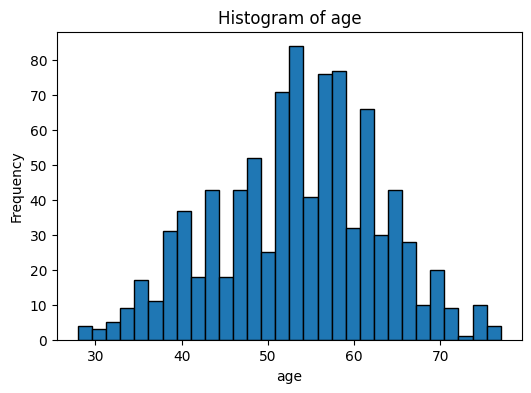

In [243]:
plt.figure(figsize=(6,4))
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'age'}')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

Overall, not too worried about age we seem to hava an overal normal distribution, exspecally if we colapse the bins.

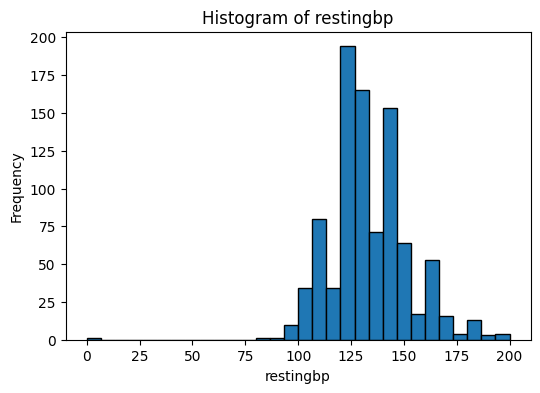

In [244]:
plt.figure(figsize=(6,4))
plt.hist(df['restingbp'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'restingbp'}')
plt.xlabel('restingbp')
plt.ylabel('Frequency')
plt.show()


From my understanding this seem to be what I would expect for resting blood pressure. scale this for sure.

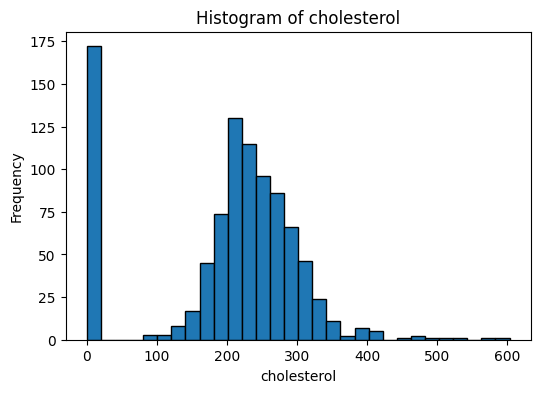

In [245]:
plt.figure(figsize=(6,4))
plt.hist(df['cholesterol'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'cholesterol'}')
plt.xlabel('cholesterol')
plt.ylabel('Frequency')
plt.show()

This is a bit concerning, as we have around 175 people at zero. We may wish to fix this, as I'm guessing this is a data entry error.

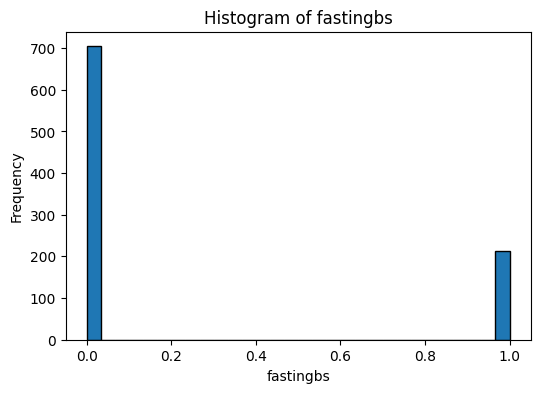

In [246]:
plt.figure(figsize=(6,4))
plt.hist(df['fastingbs'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'fastingbs'}')
plt.xlabel('fastingbs')
plt.ylabel('Frequency')
plt.show()

 This appears to be a data issue as well, with 700 people at 0. Most likely remove from the dataset.

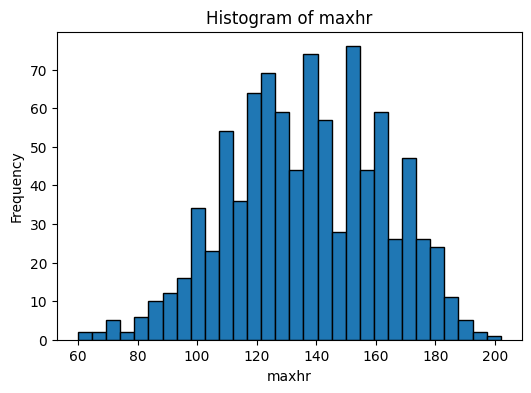

In [247]:
plt.figure(figsize=(6,4))
plt.hist(df['maxhr'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'maxhr'}')
plt.xlabel('maxhr')
plt.ylabel('Frequency')
plt.show()


this seems to be exspected from what I understand about heart rate.

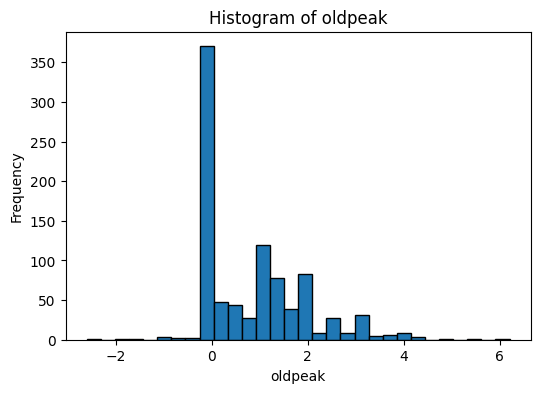

In [248]:
plt.figure(figsize=(6,4))
plt.hist(df['oldpeak'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'oldpeak'}')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.show()

I need to look this one up to see whats going on.

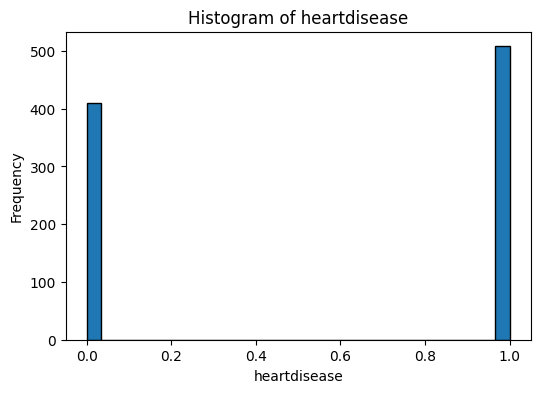

In [249]:
plt.figure(figsize=(6,4))
plt.hist(df['heartdisease'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'heartdisease'}')
plt.xlabel('heartdisease')
plt.ylabel('Frequency')
plt.show()

there is a bit of a calls impbalance here, so something to note.

## Preprocessing Data for the models

In [250]:
## droping fastbs as it just dosn't have enought data to be useful.
df.drop(columns=['fastingbs'], inplace=True)

## setting restingbp and cholesterol zero to nan and then filling with the mean.
df['restingbp'] = df['restingbp'].replace(0, np.nan)
df['cholesterol'] = df['cholesterol'].replace(0, np.nan)

## fill the nan with the mean of the column
df.fillna({'restingbp': df['restingbp'].mean(), 'cholesterol': df['cholesterol'].mean()}, inplace=True)


,age,sex,chestpaintype,restingbp,cholesterol,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140.0,289.0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,LVH,174,N,0.0,Flat,1


In [ ]:
## converting cholesterol to a categorical variable to remove the outliers.
df['cat_cholesterol'] = df['cholesterol'].apply(lambda x: 'high' if x > 240 else 'medium' if x > 200 else 'low')
df.drop(columns=['cholesterol'], inplace=True)

In [ ]:
## encode data  - for these drop the frist column is ok as they come out to be Y, N fields
df = pd.get_dummies(df, columns=['sex','exerciseangina'],drop_first=True)

## for these we want to keep the frist column as they have meaning.
df = pd.get_dummies(df, columns=['chestpaintype','restingecg','st_slope','cat_cholesterol'])

### Final Layout of the data

In [198]:
df

,age,restingbp,maxhr,oldpeak,heartdisease,sex_M,exerciseangina_Y,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,st_slope_Down,st_slope_Flat,st_slope_Up,cat_cholesterol_high,cat_cholesterol_low,cat_cholesterol_medium
0,40,140.0,172,0.0,0,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False
1,49,160.0,156,1.0,1,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False
2,37,130.0,98,0.0,0,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False
3,48,138.0,108,1.5,1,False,True,True,False,False,False,False,True,False,False,True,False,False,False,True
4,54,150.0,122,0.0,0,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,132,1.2,1,True,False,False,False,False,True,False,True,False,False,True,False,True,False,False
914,68,144.0,141,3.4,1,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False
915,57,130.0,115,1.2,1,True,True,True,False,False,False,False,True,False,False,True,False,False,True,False
916,57,130.0,174,0.0,1,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True


## Split the data into train and test

In [199]:
scaler = StandardScaler()
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['heartdisease'])

train_x = scaler.fit_transform(train_df.drop(columns=['heartdisease']))
test_x = scaler.transform(test_df.drop(columns=['heartdisease']))

train_y = train_df['heartdisease']
test_y = test_df['heartdisease']

## Create Logistic Regression Model

In [ ]:
### set up parameters so we can select the best model
parameters = {'C':[0.01,0.1,1,10,100],'l1_ratio':[0,1],'solver':['liblinear', 'saga']}

lg_reg = LogisticRegression()
clf = GridSearchCV(lg_reg, parameters, n_jobs=-1, cv=5)
clf.fit(train_x,train_y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...], 'l1_ratio': [0, 1], 'solver': ['liblinear', 'saga']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displaye

## Model Preformance

In [ ]:
print(classification_report(clf.predict(test_x),test_y))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        87
           1       0.87      0.92      0.89        97

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.89       184
weighted avg       0.89      0.89      0.89       184



In [205]:
y_scores = clf.predict_proba(test_x)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,y_scores)
roc_auc = auc(fpr,tpr)
print(f"ROC AUC: {roc_auc}")


ROC AUC: 0.9320899091343855


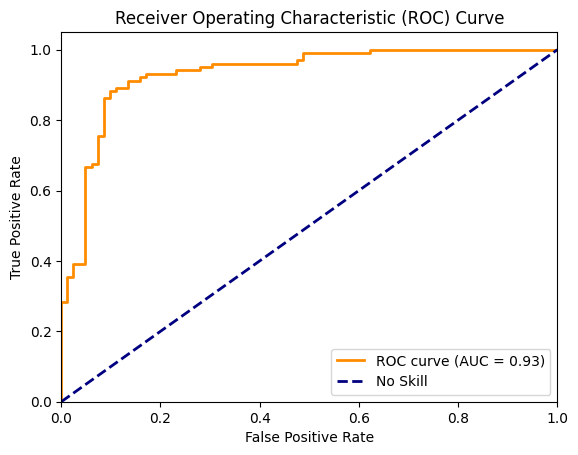

In [206]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Try differnt type of Logistic Regression

In [207]:
parameters = {'C':[0.01,0.05,0.1,0.5,1,10,100],
                'l1_ratio':[0],
                'dual':[False],
                'fit_intercept':[True,False],
                'class_weight':[None,'balanced'],
                'solver':['lbfgs', 'liblinear', 'newton-cg','newton-cholesky','sag'],
                }

lg_reg = LogisticRegression()
clf = GridSearchCV(lg_reg, parameters, n_jobs=-1, cv=5)
clf.fit(train_x,train_y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.05, ...], 'class_weight': [None, 'balanced'], 'dual': [False], 'fit_intercept': [True, False], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displ

## Model Preformance

In [208]:
print(classification_report(clf.predict(test_x),test_y))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        87
           1       0.87      0.92      0.89        97

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.89       184
weighted avg       0.89      0.89      0.89       184



In [209]:
y_scores = clf.predict_proba(test_x)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,y_scores)
roc_auc = auc(fpr,tpr)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.9320899091343855


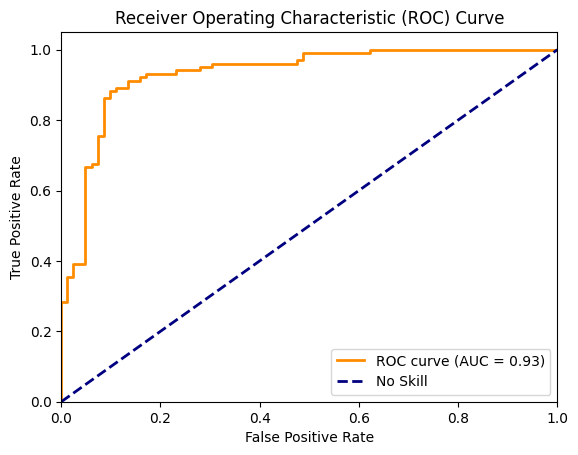

In [210]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Gradient Bosting Model

In [211]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'loss':['log_loss','exponential'],
              'learning_rate':[0.01,0.05,0.1,0.5,1, 1.5, 2, 2.5, 3],
              'n_estimators':[10,50,100],
              'subsample':[0.5,0.75,1],
              'max_depth':[3,5,7,10, 15, 20, 25, 30],
              }

gbm = GradientBoostingClassifier(random_state=42)

clf = GridSearchCV(gbm, param_grid, n_jobs=-1, cv=5)
clf.fit(train_x,train_y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",GradientBoost...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.01, 0.05, ...], 'loss': ['log_loss', 'exponential'], 'max_depth': [3, 5, ...], 'n_estimators': [10, 50, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold a

## Model Preformance

In [212]:
print(classification_report(clf.predict(test_x),test_y))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        86
           1       0.84      0.88      0.86        98

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [213]:
y_scores = clf.predict_proba(test_x)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,y_scores)
roc_auc = auc(fpr,tpr)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.9163079866092778


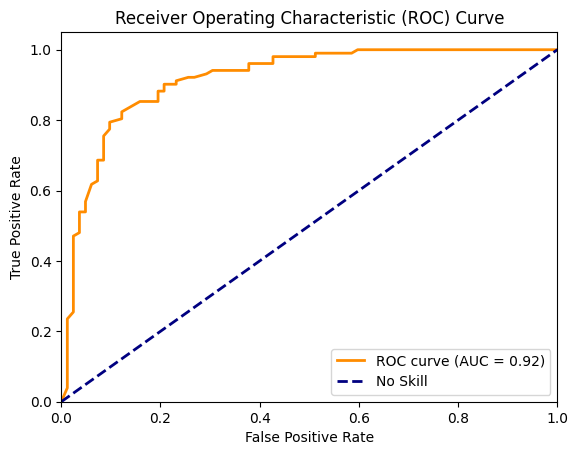

In [214]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Multi-Layer Perceptron

In [231]:
class classifier(torch.nn.Module):
    def __init__(self):
        super(classifier, self).__init__()
        self.fc1 = torch.nn.Linear(19, 50)
        self.fc2 = torch.nn.Linear(50,50)
        self.fc3 = torch.nn.Linear(50,1)
        self.sig = torch.nn.Sigmoid()
        self.dropout = torch.nn.Dropout(0.1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.sig(x)
        return x




In [232]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = classifier().to(device)

t_train_x = torch.tensor(train_x, dtype=torch.float32).to(device)
t_train_y = torch.tensor(train_y, dtype=torch.float32).to(device)
t_test_x = torch.tensor(test_x, dtype=torch.float32).to(device)
t_test_y = torch.tensor(test_y.reset_index(drop=True), dtype=torch.float32).to(device)

In [233]:
acc_list = []
precision_list = []
recall_list = []
loss_list = []
auroc_list = []

##torchmetrics.functional.auroc


## default choice for most models
optimizer = torch.optim.Adam(model.parameters(), lr=0.001,weight_decay=0.0001)
## google serach suggest this for binary classification
criterion =torch.nn.BCEWithLogitsLoss()

for epoch in range(600):
    model.train()
    x = model(t_train_x)
    x = x.squeeze()

    loss = criterion(x, t_train_y)
    loss_list.append(loss.item())
    acc_list.append(torchmetrics.functional.classification.accuracy(x, t_train_y,task='binary',threshold=0.5).cpu())
    precision_list.append(torchmetrics.functional.classification.precision(x, t_train_y,task='binary',threshold=0.5).cpu())
    recall_list.append(torchmetrics.functional.classification.recall(x, t_train_y,task='binary',threshold=0.5).cpu())
    auroc_list.append(torchmetrics.functional.auroc(x, t_train_y.type(torch.int32),task='binary').cpu())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


## Training Plots

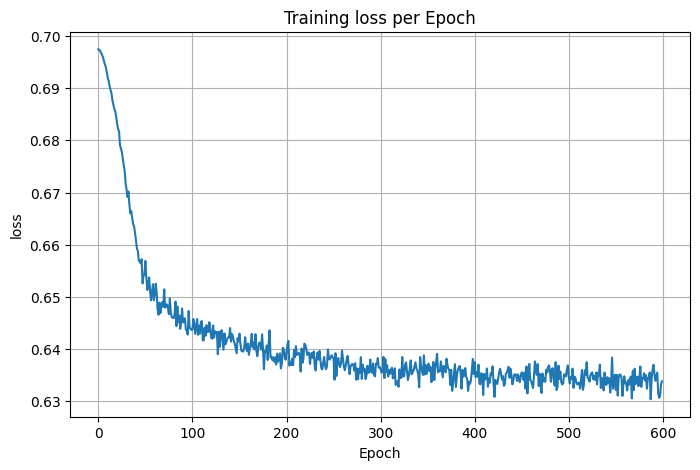

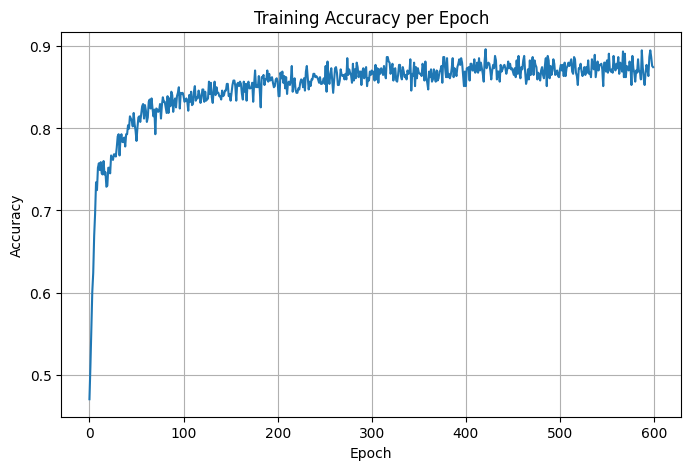

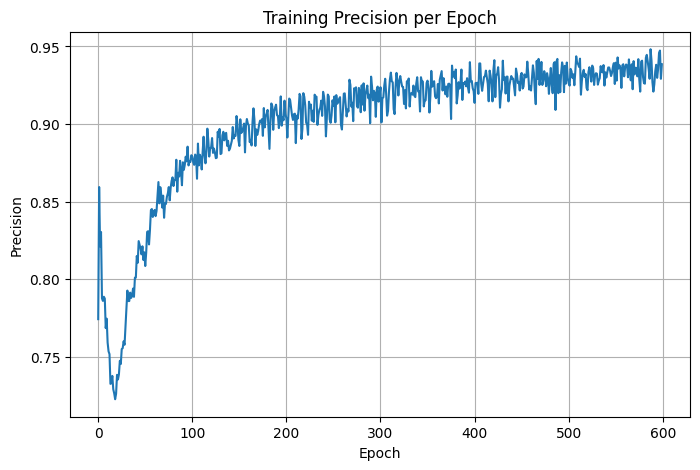

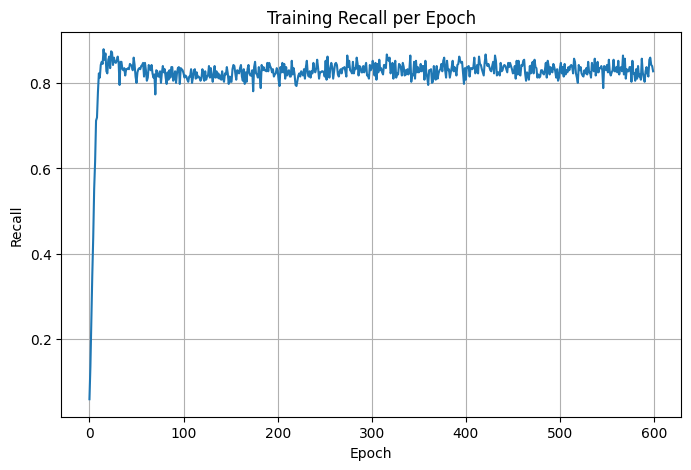

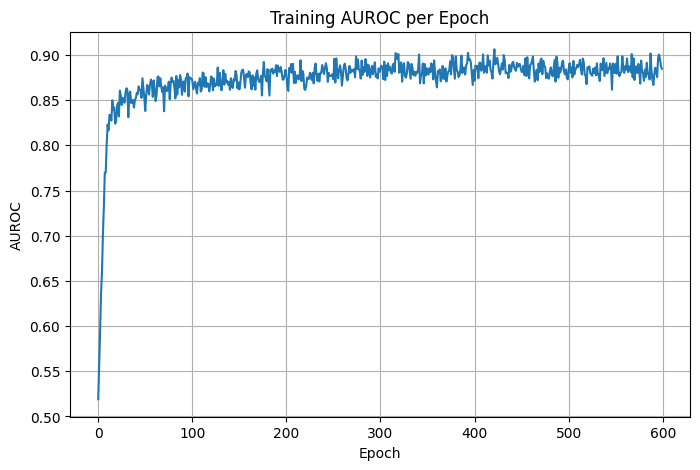

In [234]:
plt.figure(figsize=(8,5))
plt.plot(loss_list)
plt.title("Training loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(acc_list)
plt.title("Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(precision_list)
plt.title("Training Precision per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(recall_list)
plt.title("Training Recall per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(auroc_list)
plt.title("Training AUROC per Epoch")
plt.xlabel("Epoch")
plt.ylabel("AUROC")
plt.grid(True)
plt.show()

## Model Preformance

In [235]:
model.eval()
with torch.no_grad():
    x = model(t_test_x)
    x = x.squeeze()

Accuracy: 0.907608687877655, Precision: 0.9126213788986206, Recall: 0.9215686321258545, AUROC: 0.9213294982910156


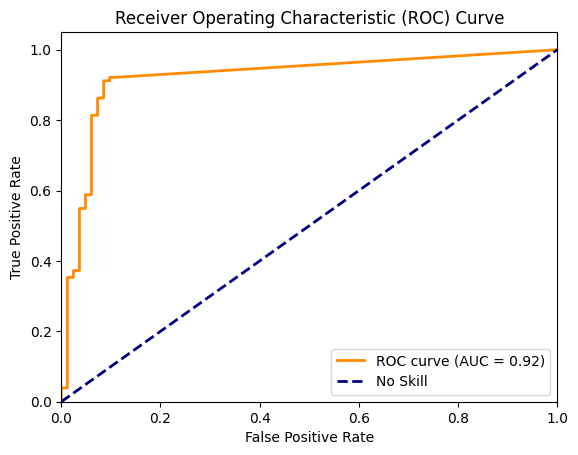

In [236]:


acc = torchmetrics.functional.classification.accuracy(x, t_test_y,task='binary',threshold=0.5)
precision = torchmetrics.functional.classification.precision(x, t_test_y,task='binary',threshold=0.5)
recall = torchmetrics.functional.classification.recall(x, t_test_y,task='binary',threshold=0.5)
auroc = torchmetrics.functional.auroc(x, t_test_y.type(torch.int32),task='binary')

print(f'Accuracy: {acc}, Precision: {precision}, Recall: {recall}, AUROC: {auroc}')

fpr, tpr, thresholds = torchmetrics.functional.roc(x, t_test_y.type(torch.int32),task='binary')


plt.figure()
plt.plot(fpr.cpu(), tpr.cpu(), color='darkorange', lw=2, label=f'ROC curve (AUC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()